In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing FRAV 3D dataset
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,106):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(1484, 100, 100, 3)

In [3]:
Xtest.shape

(212, 100, 100, 3)

In [4]:
ytrain.shape

(1484,)

In [5]:
ytest.shape

(212,)

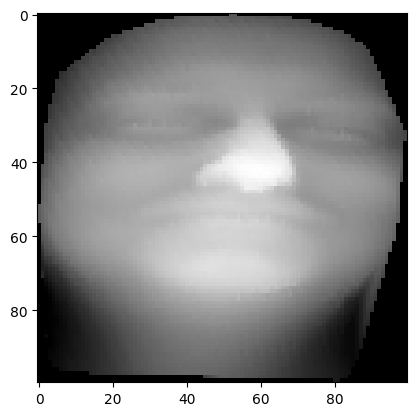

In [6]:
plt.imshow(Xtrain[1483])

In [7]:
ytrain[1483]

105

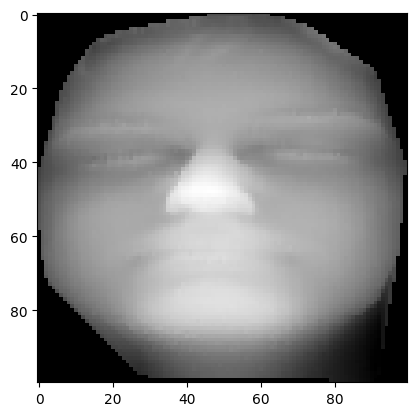

In [8]:
plt.imshow(Xtrain[211])

In [9]:
ytest[211]

105

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import InceptionV3

In [15]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [16]:
for layer in base_model.layers[:-25]:
    layer.trainable=False

In [17]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(212,activation='relu'))

model.add(Dense(106,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 212)               434388    
                                                                 
 dense_3 (Dense)             (None, 106)               22578     
                                                                 
Total params: 22259750 (84.91 MB)
Trainable params: 3277446 (12.50 MB)
Non-trainable params: 18982304 (72.41 MB)
_________________________________________________________________


In [18]:
model.fit(Xtrain,ytrain,epochs=8,validation_data=(Xtest,ytest))

Epoch 1/8
47/47 [==============================] - 43s 686ms/step - loss: 3.5184 - accuracy: 0.2736 - val_loss: 4.1682 - val_accuracy: 0.1934
Epoch 2/8
47/47 [==============================] - 29s 608ms/step - loss: 1.1238 - accuracy: 0.7365 - val_loss: 2.3497 - val_accuracy: 0.4528
Epoch 3/8
47/47 [==============================] - 29s 607ms/step - loss: 0.3464 - accuracy: 0.9319 - val_loss: 1.6499 - val_accuracy: 0.6226
Epoch 4/8
47/47 [==============================] - 29s 611ms/step - loss: 0.1315 - accuracy: 0.9730 - val_loss: 1.2107 - val_accuracy: 0.7075
Epoch 5/8
47/47 [==============================] - 29s 609ms/step - loss: 0.0483 - accuracy: 0.9912 - val_loss: 1.0298 - val_accuracy: 0.7358
Epoch 6/8
47/47 [==============================] - 28s 606ms/step - loss: 0.0349 - accuracy: 0.9953 - val_loss: 0.9927 - val_accuracy: 0.7736
Epoch 7/8
47/47 [==============================] - 29s 614ms/step - loss: 0.0255 - accuracy: 0.9960 - val_loss: 1.0574 - val_accuracy: 0.7406
Epoch 

In [19]:
yprob=model.predict(Xtest)
yprob.shape

7/7 [==============================] - 7s 439ms/step


(212, 106)

In [20]:
ypred=yprob.argmax(axis=1)
ypred.shape

(212,)

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         2
           9       0.50      1.00      0.67         2
          10       0.33      0.50      0.40         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       1.00      0.50      0.67         2
          15       0.29      1.00      0.44         2
          16       1.00      1.00      1.00         2
          17       0.50    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

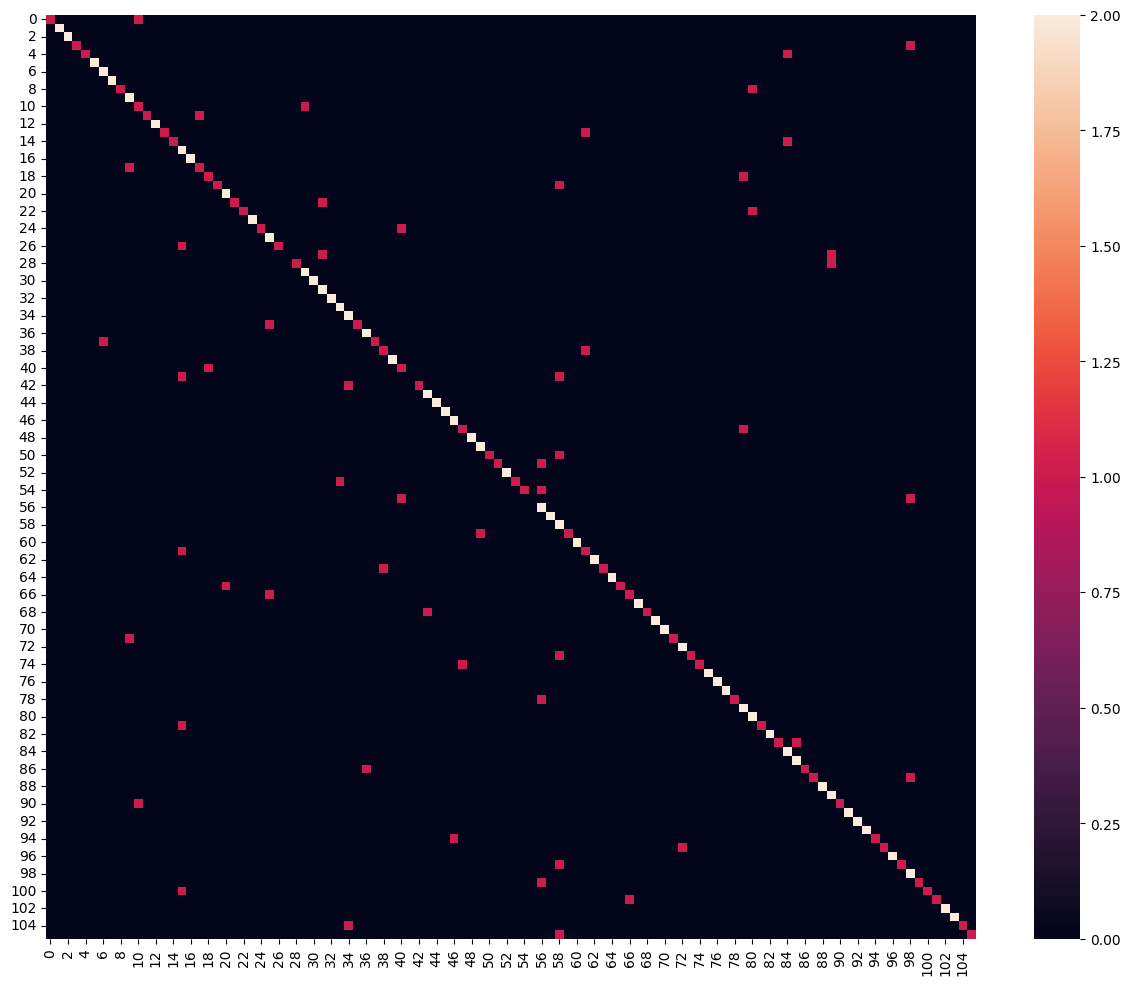

In [22]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()